In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ticker = yf.Ticker("AAPL")
hist = ticker.history(period="40y")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1981-01-27,0.113393,0.113393,0.112514,0.112514,23699200,0.0,0.0
1981-01-28,0.109437,0.109437,0.108998,0.108998,28156800,0.0,0.0
1981-01-29,0.105482,0.105482,0.105042,0.105042,43904000,0.0,0.0
1981-01-30,0.100208,0.100208,0.099329,0.099329,46188800,0.0,0.0
1981-02-02,0.094055,0.094055,0.093615,0.093615,23766400,0.0,0.0


## Historical Record

Adjusted closing price of Apple stock (AAPL) from 1981 up until the present.

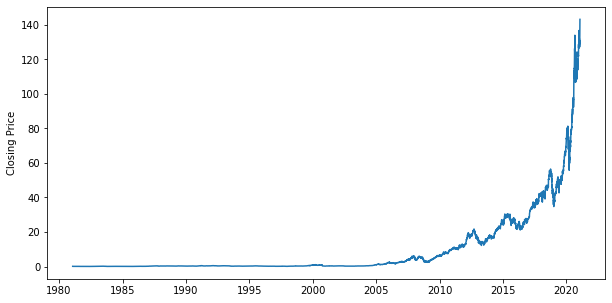

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(hist["Close"])
plt.ylabel("Closing Price")
plt.show()

## Returns and Log Returns

The returns and log returns for these daily data have very similar values. This is because daily returns are small $-$ the values are close to 0, so the property $\ln(1 + r) \approx r$ applies.

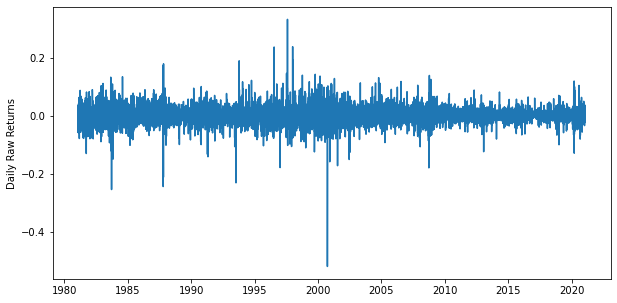

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(hist["Close"].pct_change())
plt.ylabel("Daily Raw Returns")
plt.show()

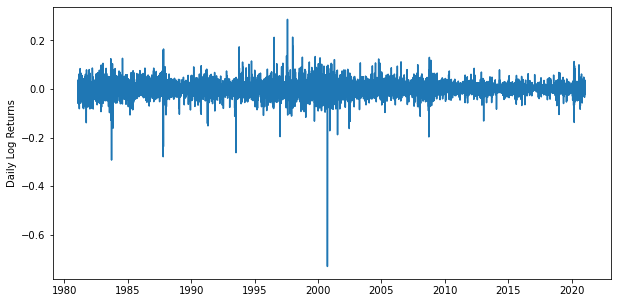

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(np.log1p(hist["Close"].pct_change()))
plt.ylabel("Daily Log Returns")
plt.show()

## Histogram $-$ Returns and Log Returns

Here we've plotted a histogram of AAPL's log returns from 1981 to the present, and we've overlaid a scaled normal distribution. We can see a few things right away from this plot. First, the values are centered around 0, and in fact look roughly normal. However, the **tails** of the histogram clearly lie above the tails of the normal distribution. We call these **"fat tails"**.

In general, the normal distribution can be a _reasonable_ approximation for short-term returns and log returns for some applications. However, many analyses have shown that the data **do not conform perfectly to a normal distribution**, and often deviate significantly in the tails. The significance of this is that the normal distribution predicts fewer extreme events than are actually observed. The conversation about the best model for the distribution of returns has been going on for at least the past century. The best model will depend on exactly what your analysis seeks to achieve.

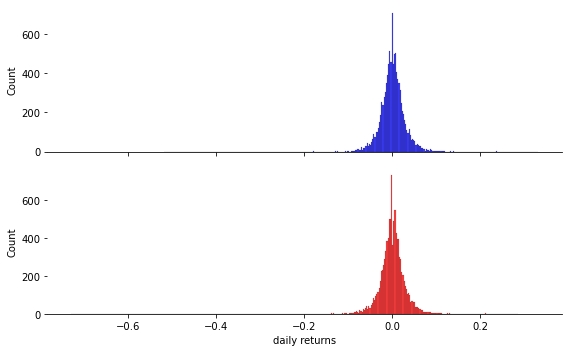

In [10]:
f, axes = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

sns.despine(left=True)

sns.histplot(hist["Close"].pct_change(), color="b", ax=axes[0])
sns.histplot(np.log1p(hist["Close"].pct_change()), color="r", ax=axes[1])

plt.xlabel("daily returns")
plt.tight_layout()

## Normality and Long-Term Investments

Based on historical data, it may be reasonable to consider short-term returns as approximately normally distributed for some purposes. However, even if short-term returns are normally distributed, long-term returns cannot be. If $r_1 = \frac{p_1 - p_0}{p_0}$ and $r_2 = \frac{p_2 - p_1}{p_1}$ are normally distributed, the sum of these, $r_1 + r_2$ would be normally distributed. But the two-period return is not the sum of the one-period returns.

Two-period return = $\frac{p_2 - p_0}{p_0}$

$\frac{p_2 - p_0}{p_0} + 1 = \frac{p_2 - p_0}{p_0} + \frac{p_0}{p_0} = \frac{p_2}{p_0}$

$= \frac{p_1}{p_0} \times \frac{p_2}{p_1}$

$=(1 + r_1)(1 + r_2)$

The product $=(1 + r_1)(1 + r_2)$ is **not normal**, and become noticeably less normal as the product grows over time.

In [21]:
p0 = hist['Close'].iloc[0]
raw_ret = hist['Close'].pct_change()
pt = p0 * (1 + raw_ret).prod()
print("p0=", p0)
print("pt=", pt)

p0= 0.11251390725374222
pt= 143.1600036621097


C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

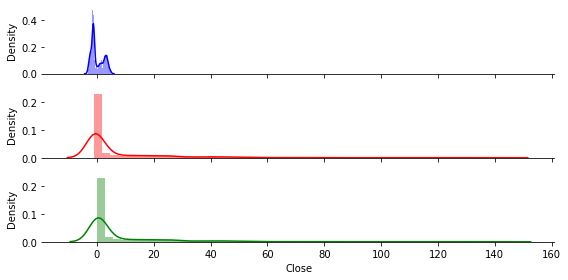

In [33]:
f, axes = plt.subplots(3, 1, figsize=(8, 4), sharex=True)

sns.despine(left=True)

y = np.log(hist["Close"])
e_to_y = np.expm1(y)
sns.distplot(y, color="b", ax=axes[0])
sns.distplot(e_to_y, color="r", ax=axes[1])
sns.distplot(hist["Close"], color="g", ax=axes[2])

plt.tight_layout()

## Distribution of Log Returns

So long-term prices and cumulative returns can be modeled as approximately lognormally distributed because they are products of independently, identically distributed (IID) random variables. On the other hand, log returns sum over time. Therefore, if $R_1 = \ln\left(\frac{p_1}{p_0}\right)$ and $R_2 = \ln\left(\frac{p_2}{p_1}\right)$ are normal, their sum, the two-period log return, is also normal. Even if they are not normal, as long as they are IID, their long-term sum will be approximately normal, thanks to the **Central Limit Theorem**. This is one reason why using log returns can be convenient for modeling purposes.

## Central Limit Theorem (CLT)

The sum of random variables that have the same distribution and are not dependent on each other approaches a **normal distribution** and the limit that the number of random variables and the sum goes to the infinity.


$p_t = p_0 \times (1 + r_1) \times (1 + r_2) \times ... \times (1 + r_n)$

$log(p_t) = log(p_0) + log(1 + r_1) + log(1 + r_2) + ... + log(1 + r_n)$

$log(p_t) - log(p_0) = log(1 + r_1) + log(1 + r_2) + ... + log(1 + r_n) = \sum_{1}^n(log(1 + r_i)$

By CLT, $\sum_{1}^n(log(1 + r_i)$ is a random variable that follows a normal distribution. So we have that $log(p_t) - log(p_0)$ is distributed normally. But if $p_0$ is a constant, then $log(p_t)$ is also distributed normally. Hence,

+ $Y=log(p_t) \approx$ normal
+ $e^Y= e^{log(p_t)} = p_t \approx$ log-normal


### Normal x Log-Normal distribution

$Y \approx$ normal $\rightarrow e^Y \approx$ log-normal

+ log-returns $\approx$ normal
+ prices $\approx$ log-normal